# WORD2VEC TUTORIAL

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/MyDrive/Word Embedding"

Mounted at /content/drive
/content/drive/MyDrive/Word Embedding


## Part 1. Explore interesting properties of the word vectors with GenSim 


### Install the library
By default, **gensim already installed in the Colab**. In case that your computer does not have the library, we can install by one of the following ways:

$ pip install gensim

or 

$ conda install -c anaconda gensim

### Import gensim
To import the library, use the following line of codes:

In [5]:
# Try Word2Vec with Gensim
import gensim

### Download the pretrained model

Word2vec embedding is trained on huge amount of data (billions of text) with many GPUs and may take a couple of weeks to finish. Therefore, using a pretained model is a more feasible solution of many people.

To download the pretrained model, please use `wget` with the following url. For more information, please refer to https://fasttext.cc

It may takes 1 minute to download and unzip the model.

In [6]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
# Unzip the model
!unzip wiki-news-300d-1M.vec.zip

--2022-11-15 07:27:24--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   859KB/s    in 11m 20s 

2022-11-15 07:38:45 (979 KB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


Then, load the model using `gensim` lib. It may takes 3-4 minutes.

In [7]:
model = gensim.models.KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

Let's try the very first step: trying to represent a token by a feature vector.

For example, we use the following syntax to map the word `'king'` to a 300-dimensonal vector:

In [8]:
king_vec = model["king"]

Then, we print out the values of the representation vector of `'king'`:

In [9]:
print(king_vec)

[ 1.082e-01  4.450e-02 -3.840e-02  1.100e-03 -8.880e-02  7.130e-02
 -6.960e-02 -4.770e-02  7.100e-03 -4.080e-02 -7.070e-02 -2.660e-02
  5.000e-02 -8.240e-02  8.480e-02 -1.627e-01 -8.510e-02 -2.950e-02
  1.534e-01 -1.828e-01 -2.208e-01  2.430e-02 -9.210e-02 -1.089e-01
 -1.009e-01 -1.190e-02  3.770e-02  2.038e-01  7.200e-02  2.020e-02
  2.798e-01  1.150e-02 -1.510e-02  1.037e-01  4.000e-04 -1.040e-02
  1.960e-02  1.265e-01  8.280e-02 -1.369e-01  1.070e-01  1.270e-01
 -3.490e-02 -6.830e-02 -1.140e-02  3.370e-02  1.260e-02  7.920e-02
  4.400e-02 -2.530e-02  4.890e-02 -7.850e-02 -6.259e-01 -9.720e-02
  1.654e-01 -5.780e-02 -4.370e-02  4.090e-02 -1.820e-02 -1.891e-01
  2.770e-02 -1.460e-02 -5.310e-02  4.260e-02  4.900e-03  4.000e-03
  1.423e-01 -9.750e-02 -3.500e-03  9.630e-02 -1.900e-03 -1.466e-01
 -1.662e-01  6.650e-02 -1.500e-01 -1.267e-01  2.670e-02 -1.560e-01
 -1.442e-01  1.515e-01  2.420e-02 -6.080e-02  9.180e-02 -2.407e-01
 -4.110e-02 -1.420e-02  6.550e-02 -3.590e-02  1.459e-01  9.400

I'm sure that, you will dont understand the meaning of this vector. Me too. But, we can use that feature vector compute the similarity with other words.

In [10]:
car = model['car']
queen = model['queen']
power = model['power']
king = model['king']

print('queen and king: ', queen.dot(king))
print('power and king: ', power.dot(king))
print('car and king: ', car.dot(king))

queen and king:  3.2907822
power and king:  1.6147376
car and king:  1.4670291


We guess that, maybe if word A and B have similar meaning, there representation vectors are more similar. So we try with `'like'`, `'love'` and `'hate'`:

In [30]:
love = model["love"]
like = model["like"]
hate = model["hate"]
print("{} and {} is {}".format("love", "like", love.dot(like)))
print("{} and {} is {}".format("love", "hate", love.dot(hate)))
print("{} and {} is {}".format("like", "hate", like.dot(hate)))

love and like is 1.6091171503067017
love and hate is 2.8157126903533936
like and hate is 1.8135114908218384


In [33]:
import numpy as np 

love = np.array(love)
hate = np.array(hate)
print(np.sum(np.dot(love, hate)))

2.8157127


Why `'love'` and `'hate'` are more similar. In fact, `'love'` and `'hate'` have different grammatical roles in sentences in English while `'love'` and `'like'` are pretty different. We can you Google Translate to see the differences.

### Linguistic regularities
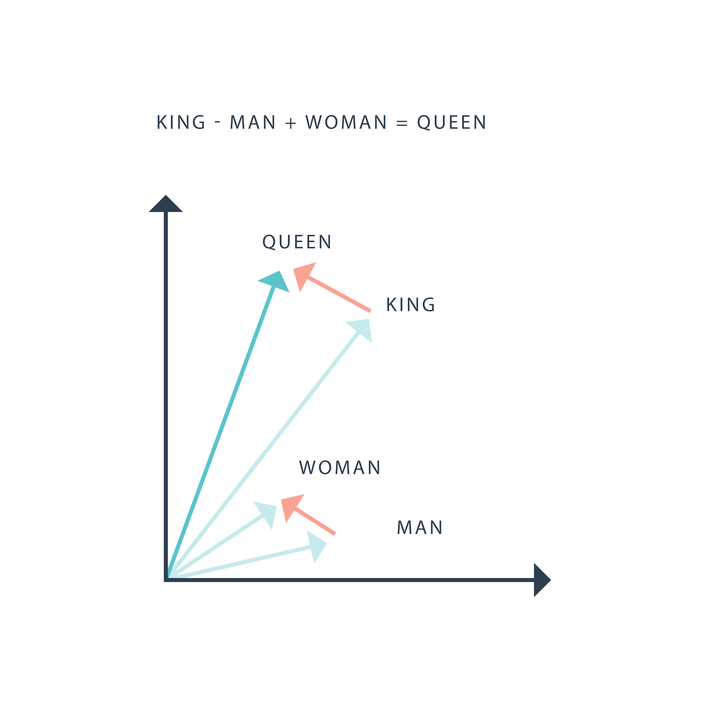


It was recently shown that the word vectors capture many linguistic regularities, for example vector operations `model['king'] - model['man'] + model['woman'] is close to model['queen']`.


In [11]:
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7515910863876343), ('monarch', 0.6741327047348022), ('princess', 0.6713887453079224), ('kings', 0.6698989868164062), ('kingdom', 0.5971318483352661), ('royal', 0.5921063423156738), ('uncrowned', 0.5911505818367004), ('prince', 0.5909028053283691), ('lady', 0.5904011130332947), ('monarchs', 0.5884358286857605)]


We can also ask the model to answer the following question: If `'king'` is a `'man'` then `'queen'` is ...?

In [18]:
def query(a, b, c):
  word, score = (model.most_similar(positive=[a, b], negative=[c]))[0]
  print("If \"{}\" is a \"{}\", then \"{}\" is: \"{}\"".format(b, c, a, word))

In [19]:
query('woman', 'king', 'man')

If "king" is a "man", then "woman" is: "queen"


### Exercise
Let's try with the following relations:
- Capital - Country
- Noun - Plural form 
- Verb - V3 form

In [28]:
query('China', 'Hanoi', 'Vietnam')

If "Hanoi" is a "Vietnam", then "China" is: "Beijing"


In [27]:
query('cars', 'dog', 'dogs')

If "dog" is a "dogs", then "cars" is: "car"


In [29]:
query('done', 'go', 'went')

If "go" is a "went", then "done" is: "do"


## Part 2. Word2vec with Tensorflow

For tensorflow framework, there also have a collections of pretrained models, too. We use Tensorflow Hub to download and import the model.

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")


To get the representation vector of words, we use `numpy()` after a mapping method like `gensim`:

In [ ]:
love_vec = embed(["love"]).numpy()
like_vec = embed(["like"]).numpy()
hate_vec = embed(["hate"]).numpy()

Similary to `gensim`, we can use dot product to compute the similarity between word presentation vectors.

In [ ]:
love_vec.dot(like_vec.T)

array([[0.24091528]], dtype=float32)

In [ ]:
love_vec.dot(hate_vec.T)

array([[0.5915959]], dtype=float32)